#### Axion Cosmology
<br> Author: Manish Tamta </br>
<br> Dated: July 23, 2024 </br>
<br> Last modified: August 05, 2024 </br>

In [2]:
## importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import gamma, jv

##### Solving the KG equation for scalar field (axion)
<br> $\ddot{\phi} + 3H(t)\dot{\phi} + m^2 \phi = 0$ </br> 
<br> during radiation domination, </br> 
<br> $H(t) = \frac{1}{2t}$ </br>
<br> and, $a(t) \sim t^{1/2}$ </br>
<br> Now, $T \sim \frac{1}{a} \sim t^{-1/2}$ </br>

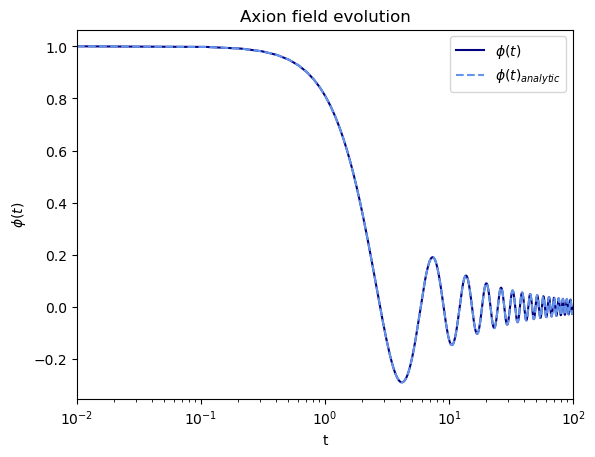

In [3]:
def ode(t, y, m):
    phi, phi_dot = y
    H = 1 / (2*t)
    phi_ddot = -(3*H*phi_dot) - (m**2)*phi

    return [phi_dot, phi_ddot]


def phi_axi(t): ## analytical solution
    phi_i = 1
    m_phi = 1
    nu = 1/4
    phi = phi_i*((2/(m_phi*t))**(1/4)*gamma(5/4))*jv(nu, m_phi*t)
    return phi

## ICs and params
t0 = 1.e-2
t_final = 1.e2
phi0 = 1.0
phi_dot0 = 0.0
m = 1.0

## time points for solving ODE
t_span = (t0, t_final)

## solution
sol = solve_ivp(lambda t, y: ode(t, y, m), t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

## extracting the solution
t = np.linspace(t0, t_final, 1000)
phi = sol.sol(t)[0]  ## phi as a function of t
phi_axi_list = [phi_axi(t_) for t_ in t] ## analytical 

#plt.figure(figsize=(10, 6))
plt.plot(t, phi, '-', color='navy', label=r'$\phi(t)$')
plt.plot(t, phi_axi_list, '--', color='cornflowerblue', label=r'$\phi(t)_{analytic}$')
plt.xlabel(r't')
plt.ylabel(r'$\phi(t)$')
plt.title('Axion field evolution')
plt.legend()
plt.xscale('log')
plt.xlim(t0, t_final)
plt.show()

<br> Energy density of axion field </br> 
<br> $\rho_{\phi} = \frac{1}{2} \dot{\phi}^2 + \frac{1}{2} m^2 \phi^2$ </br>
<br> during radiation domination, </br> 
<br> $a \sim t^{1/2} \implies \rho_{\phi} \sim a^{-3}$ (behaves like matter as seen in the plot below) </br>

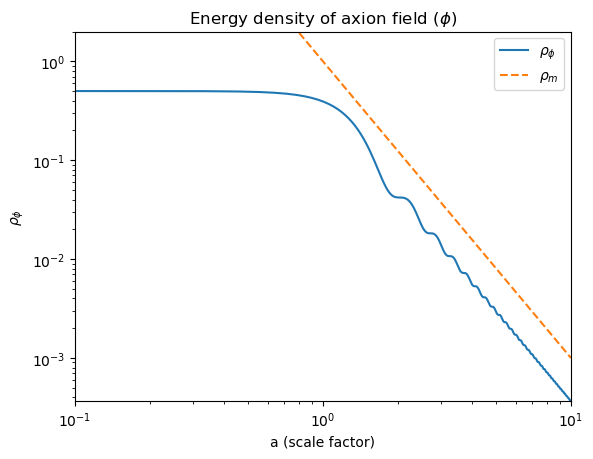

In [4]:
## energy density of axion field

def calculate_rho_phi(phi, phi_dot, m):
    rho_phi = 0.5 * phi_dot**2 + 0.5 * (m**2) * phi**2
    return rho_phi

## extracting the solution of KG equation
t = np.linspace(t0, t_final, 1000)
phi = sol.sol(t)[0]
phi_dot = sol.sol(t)[1]
m = 1.0

## expressing in terms of scale factor
a = np.sqrt(t)

# Calculate rho_phi
rho_phi = calculate_rho_phi(phi, phi_dot, m)
rho_matter = a**(-3)

#plt.figure(figsize=(10, 6))
plt.plot(a, rho_phi, '-', label=r'$\rho_{\phi}$')
plt.plot(a, rho_matter, '--', label=r'$\rho_{m}$')
plt.xlabel(r'a (scale factor)')
plt.ylabel(r'$\rho_{\phi}$')
plt.title(r'Energy density of axion field ($\phi$)')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(a), max(a))
plt.ylim(min(rho_phi), 2)
plt.show()

<br> Computing $t_{osc}$ or $T_{osc}$ </br>
<br> $3H(t_{osc}) = m_{\phi}$ </br>
<br> during radiation domination, $H(t) = \frac{1}{2t}$ and $T \sim \frac{1}{a} \sim t^{-1/2}$ </br>
<br> $\implies \frac{3}{2t} = m_{\phi}$ </br>

t_osc = 1.4999999999999998
a(t_osc) = 1.224744871391589


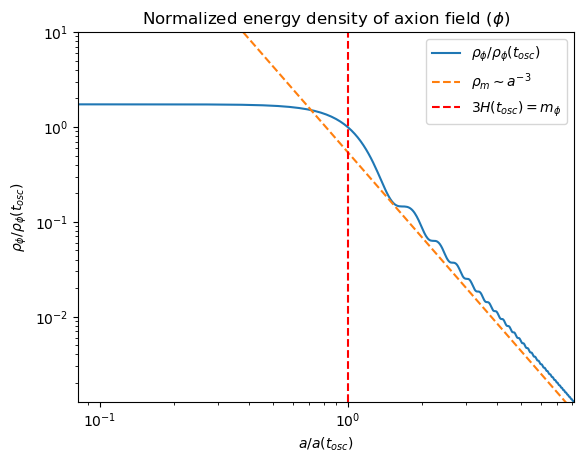

In [5]:
## normalized energy density of axion field

from scipy.optimize import fsolve

## finding t_osc such that 3*H(t_osc) = m_phi
def find_t_osc(m_phi):
    def equation(t):
        return 3 / (2*t) - m_phi
    t_guess = 1.0
    t_osc = fsolve(equation, t_guess)[0]
    return t_osc


## normalized rho_phi
def normalize_rho_phi(rho_phi, rho_phi_tosc):
    return rho_phi / rho_phi_tosc


t_osc = find_t_osc(m) ## m is defined in the above cell (m = 1)
print(f"t_osc = {t_osc}")

## rho_phi at t = t_osc
rho_phi_tosc = np.interp(t_osc, t, rho_phi)

## a at t = t_osc
a_tosc = np.sqrt(t_osc)
print(f"a(t_osc) = {a_tosc}")

rho_phi_normalized = normalize_rho_phi(rho_phi, rho_phi_tosc)
a_normalized = a / a_tosc
rho_matter = a**(-3)

#plt.figure(figsize=(10, 6))
plt.plot(a_normalized, rho_phi_normalized, label=r'$\rho_\phi / \rho_{\phi}(t_{osc})$')
plt.plot(a_normalized, rho_matter, '--', label=r'$\rho_{m} \sim a^{-3}$')
plt.axvline(x=1, color='r', linestyle='--', label=r'$3H(t_{osc}) = m_{\phi}$')
plt.xlabel(r'$a / a(t_{osc})$')
plt.ylabel(r'$\rho_\phi / \rho_{\phi}(t_{osc})$')
plt.title(r'Normalized energy density of axion field ($\phi$)')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(a_normalized), max(a_normalized))
plt.ylim(min(rho_phi_normalized), 10)
plt.show()

##### Equation of state parameter w
<br> $P = w \rho \implies w = P/\rho$ </br>
<br> from scalar field dynamics, </br>
<br> $P = \frac{\dot{\phi}^2}{2} - V({\phi})$ </br>
<br> $\rho = \frac{\dot{\phi}^2}{2} + V({\phi})$ </br>
<br> where $V({\phi}) = \frac{1}{2} m^2 \phi^2$ </br>

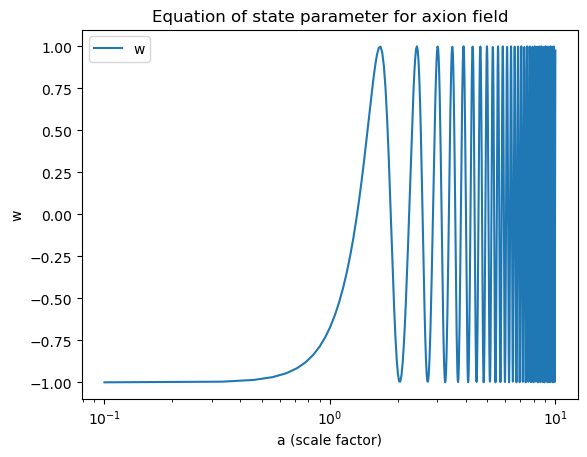

In [6]:
def calculate_P_rho(phi, phi_dot, m):
    V = 0.5 * m**2 * phi**2 ## scalar potential
    P = 0.5 * phi_dot**2 - V
    rho = 0.5 * phi_dot**2 + V
    return P, rho

def calculate_w(P, rho):
    return P / rho

P, rho = calculate_P_rho(phi, phi_dot, m)

## equation of state parameter w
w = calculate_w(P, rho)

#plt.figure(figsize=(10, 6))
plt.plot(a, w, label=r'w')
plt.xlabel(r'a (scale factor)')
plt.ylabel(r'w')
plt.title('Equation of state parameter for axion field')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.show()

<br> Equation of state w = -1 tells us that axion behaves like dark energy in the early universe.</br>
<br> At late time during the radiation domination w becomes 0 i.e. axion field behaves as dark matter.</br>

Total g_i = 118
Bosonic dof = 28
Fermionic dof = 90
Effective # of relativistic dof = 106.75
g*_max(T) = 106.74999995088137 and g*_min(T) = 9.727272726526635


/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_33707/4220144773.py:77: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_33707/4220144773.py:75: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_33707/4220144773.py:102: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 150)


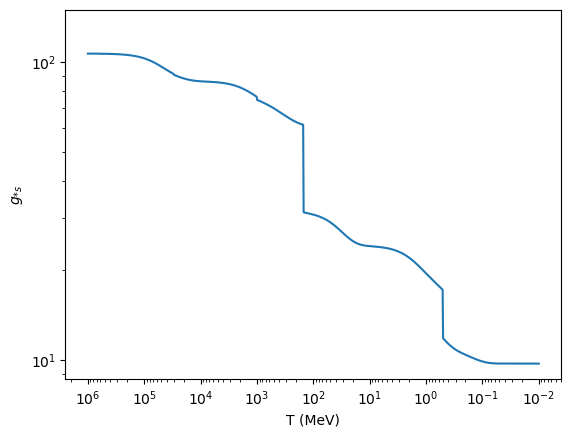

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

KtoeV = 1/11606  
T_QCD = 150 * 1e6 ## eV

T_CMB = lambda T: T
T_neutrino = lambda T: ((4/11)**(1/3)) * T

## SM particles dictionary
particles = {
   'top': {'m_i': 173*1.e9, 'T_i': 30*1.e9, 'g_i': 12, 'is_boson': False},  # in eV
   'bottom': {'m_i': 4*1.e9, 'T_i': 1*1.e9, 'g_i': 12, 'is_boson': False},
   'charm': {'m_i': 1*1.e9, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'strange': {'m_i': 100*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'down': {'m_i': 5*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'up': {'m_i': 2*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'gluon': {'m_i': 0, 'T_i': T_QCD, 'g_i': 16, 'is_boson': True},
   'tau': {'m_i': 1777*1.e6, 'T_i': T_QCD, 'g_i': 4, 'is_boson': False},
   'mu': {'m_i': 106*1.e6, 'T_i': 1.e7, 'g_i': 4, 'is_boson': False},
   'electron': {'m_i': 511*1.e3, 'T_i': 5.e5, 'g_i': 4, 'is_boson': False},
   'tau_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False}, #lambda T: T_neutrino(T)
   'mu_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'e_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'W+': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'W-': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'Z0': {'m_i': 91*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   #'photon': {'m_i': 0, 'T_i': lambda T: T, 'g_i': 2, 'is_boson': True},
   'photon': {'m_i': 0, 'T_i': 0.2, 'g_i': 2, 'is_boson': True},
   'higgs': {'m_i': 125*1.e9, 'T_i': 10*1.e9, 'g_i': 1, 'is_boson': True}
}

#### relativistic degrees of freedom 
g_iSum = 0
g_iBoson = 0
g_iFermion = 0
for particle, data in particles.items():
    g_i = data['g_i']
    is_boson = data['is_boson']
    g_iSum += g_i
    if is_boson:
        g_iBoson += g_i
    else:
        g_iFermion += g_i

print(rf'Total g_i = {g_iSum}')
print(rf'Bosonic dof = {g_iBoson}')
print(rf'Fermionic dof = {g_iFermion}')
print(rf'Effective # of relativistic dof = {g_iBoson + (7/8)*g_iFermion}')
#########################
#########################

def g_starS(T, particles):
    total_sum = 0
    for particle, data in particles.items():
        m_i = data['m_i']
        T_i = data['T_i']
        #T_i = data['T_i'](T) if callable(data['T_i']) else data['T_i']
        g_i = data['g_i']
        is_boson = data['is_boson']
        
        # Decoupling of the relativistic particles
        #x_i = m_i / T
        #factor = (45 * g_i) / (4 * np.pi**4)
        if T > T_i:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4)
        else:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4) * (4/11) #(T_i / T)**3

        def integrand(u):
            if is_boson:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
            else:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))

        ## numerical integration
        integral, _ = quad(integrand, 0, np.inf)
        result = factor * integral
        total_sum += result

    return total_sum

g_min = g_starS(1.e4, particles)
g_max = g_starS(1.e15, particles)
print('==============')
print(f'g*_max(T) = {g_max} and g*_min(T) = {g_min}')

## plotting
#T_list = np.linspace(1e4, 1e12, 100)
T_list = np.logspace(4, 12, 1000)
g_list = [g_starS(T_i, particles) for T_i in T_list]
plt.plot(T_list/1e6, g_list, '-')
plt.gca().invert_xaxis()
plt.xlabel(r'T (MeV)')
plt.ylabel(r'$g_{*s}$')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1.e0, 150)
plt.ylim(0, 150)
plt.show()

106.24624173002539
3.8961949908533433


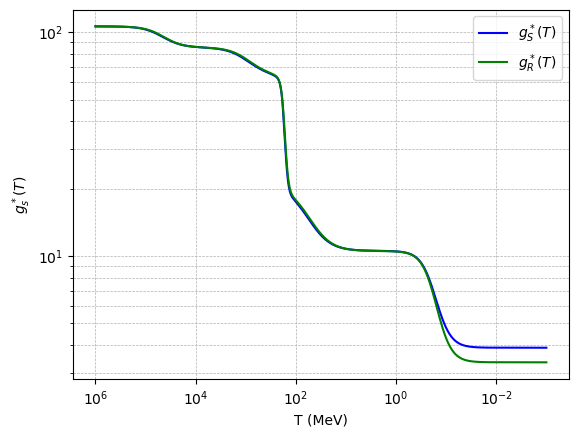

In [3]:
## Approximate fit for g*_S
aS_0 = 1.36
aS_1 = [0.498, 0.327, 0.579, 0.140, 0.109]
aS_2 = [-8.74, -2.89, -1.79, -0.102, 3.82]
aS_3 = [0.693, 1.01, 0.155, 0.963, 0.907]

aR_0 = 1.21
aR_1 = [0.572, 0.330, 0.579, 0.138, 0.108]
aR_2 = [-8.77, -2.95, -1.80, -0.162, 3.76]
aR_3 = [0.682, 1.01, 0.165, 0.934, 0.869]

def g_starS(T):
    sum = 0
    for i in range(5):
        term = aS_1[i] * (1 + np.tanh((np.log(T) - aS_2[i]) / aS_3[i])) ## log(T) where T is in GeV
        sum += term
    return np.exp(aS_0 + sum)

def g_starR(T):
    sum = 0
    for i in range(5):
        term = aR_1[i] * (1 + np.tanh((np.log(T) - aR_2[i]) / aR_3[i])) ## log(T) where T is in GeV
        sum += term
    return np.exp(aR_0 + sum)

#T_list = np.linspace(1.e-6, 5.e2, 500) ## in GeV
T_list = np.logspace(-6, 3, 500) ## in GeV
g_starS_list = [g_starS(T_) for T_ in T_list]
g_starR_list = [g_starR(T_) for T_ in T_list]
print(max(g_starS_list))
print(min(g_starS_list))
plt.plot(T_list*1.e3, g_starS_list, '-', color='blue', label=r'$g^*_S(T)$') ## converting to MeV
plt.plot(T_list*1.e3, g_starR_list, '-', color='green', label=r'$g^*_R(T)$')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g^*_{s}(T)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.xlim(min(T_list), max(T_list))
#plt.ylim(min(g_starS_list), max(g_starS_list))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().invert_xaxis()
plt.show()